# Homework Two - Classification
## Objective

As a result of completing this exercise you should be able to:

- Understand the concept of Classification (binary and multi-class classifier)
- Understand the concept of K Nearest Neighbors (KNN)
- Understand the concept of Decision Tree
- Understand the concept of Support Vector Machine (SVM)
- Process external and real-world data properly
- Build the classification models using above learning algorithms using `scikit-learn`
- Do model evaluation using classification reports using `scikit-learn`

## Instructions

### Section
This homework includes three coding sections (one section for one learning algorithm) and one disucssion section. You will build classification models using different approaches (i.e., KNN, decision tree, and SVM) with scikit-learn module in Python . 

### Submission
The assignment should be submitted on Canvas. You will submit a zip file containing a single Jupyter Notebook(ipynb file) and two subfolders ("images" and "datasets"). In the "datasets" folder, please include the data set used for this assignment. In the "images" folder, please include any images used or created for this assignment.  

- Name you zip file as hw2_$\lt$your JMU eid$\gt$.zip. For example, Dr. Yang's eid is yang4cx, then the submission would be hw2_yang4cx.zip
- Please make sure your zip file is in a valid format and can be unzip before your sumbit it

### Some useful webpage from Scikit-Learn library
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html
- https://scikit-learn.org/stable/tutorial/statistical_inference/settings.html
- https://scikit-learn.org/stable/modules/neighbors.html
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/svm.html

## Dataset

In this assignment, we will apply diverse classficiation models to an external dataset to classify glass. Imagine that you are working for CSI. Your colleagues hand you some samples of glass from some crime scene and you are asked to figure out what type of glass are they.

Please build predictive models that answers the question: "Which type of glass does a sample belong to" using the glass data (i.e., refractive index, sodium, ..., and iron) and the machine learning algorithms we have learned.

<a id="datasource"></a>

### Data source:
The data are from Kaggle and more details as well as data description can be found at https://www.kaggle.com/uciml/glass. (The dataset is the "glass.csv" on the website)

## Section I: KNN

### Preprocessing

In [38]:
# load packages and methods
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings 
warnings.filterwarnings('ignore')


In [39]:
#load glass csv data
glass = pd.read_csv("./datasets/glass.csv")
print(glass)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [40]:
#print data dimensions 
print("Dimensions:", glass.shape)

#print data information 
print("Information:")
print(glass.info())

#print data summary 
print("Summary:\n",glass.describe())

#check the first 5 sets of data
print(glass.head)

Dimensions: (214, 10)
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
Summary:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730

In [41]:
#determing x and y values 
X= pd.DataFrame(glass.drop(["Type"], axis=1),
            columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
y=glass.Type
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [47]:
# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40, stratify=y)

In [48]:
#show the numbers of observation in each set 
print('Labels counts in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels counts in the y_test', np.bincount(y_test))

Labels counts in y: [ 0 70 76 17  0 13  9 29]
Labels count in y_train: [ 0 49 53 12  0  9  6 20]
Labels counts in the y_test [ 0 21 23  5  0  4  3  9]


In [49]:
#load the packages and methods to be used
from sklearn.preprocessing import StandardScaler

#standardize features in the training and test sets
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [50]:
#double check standardized features 
print('Feature Dimension:', X.shape)
print('Class labels:', np.unique(y))

Feature Dimension: (214, 9)
Class labels: [1 2 3 5 6 7]


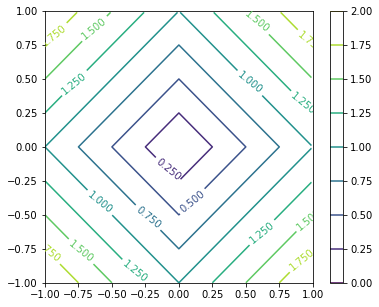

In [51]:
#determine the distance model 
#find the distance function 
#import packages and methods 
#Create a design grid of points on the unit scquare
xx, yy = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1,1,0.01))
xl = xx.flatten()
yl = yy.flatten()
xy = np.vstack((xl,yl)).T

def plot_distance_contours(dist):
    dl = dist.pairwise(xy,[[0,0]])
    dg = dl.reshape(xx.shape)
    plt.figure(1, figsize=(6, 5));
    CS=plt.contour(xx,yy,dg);
    plt.clabel(CS, inline=1, fontsize=10)
    plt.ylim((-1,1));
    plt.xlim((-1,1));
    plt.colorbar();
    plt.plot([0],[0],'ow');
    
# create the manhattan model 
glass = DistanceMetric.get_metric('manhattan')
plot_distance_contours(glass)

#save model as pdf 
plt.savefig('./images/manhattan_model.png')
plt.show()

### Learning - Training a KNN model

In [52]:
#load packages and methods 
from sklearn.neighbors import KNeighborsClassifier

#build the KNN model 
#set classifier 
knn=KNeighborsClassifier(n_neighbors=6,
                        p=2,
                        metric='minkowski')
#fit classifier on training data
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

### Prediction

Predict the label or class for a new sample with features as

RI | Na | Mg | Al | Si | K | Ca | Ba | Fe
--- | --- | --- | --- | --- | --- | --- | --- | --- 
1.6010| 12.51 | 1.67 | 2.15 | 72.19 | 0.79 | 9.3 | 0.28 | 0.54 

In [53]:
#standardize the features 
test_std=sc.transform([[1.6010,12.51,1.67,2.15,72.19,0.79,9.3,0.28,0.54]])

#make prediction
predict=knn.predict(test_std)
print(predict)

[5]


Predict the label or class for all the samples in the test set

In [54]:
y_predict= knn.predict(X_test)

### Classification Report

In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.57      0.81      0.67        21
           2       0.74      0.61      0.67        23
           3       0.50      0.20      0.29         5
           5       1.00      0.50      0.67         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.69        65
   macro avg       0.76      0.67      0.68        65
weighted avg       0.72      0.69      0.68        65



## Section II: Decision Tree

### Preprocessing

In [56]:
# load packages and methods
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings 
warnings.filterwarnings('ignore')

In [57]:
#load glass csv data
glass = pd.read_csv("./datasets/glass.csv")
print(glass)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [58]:
#print data dimensions 
print("Dimensions:", glass.shape)

#print data information 
print("Information:")
print(glass.info())

#print data summary 
print("Summary:\n",glass.describe())

#check for missing values 
print(glass.isnull().any())

Dimensions: (214, 10)
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
Summary:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730

### Learning - Training a Decision Tree model

In [59]:
# load packages and methods 
from sklearn.tree import DecisionTreeClassifier

#build a decision tree model
#set the classifiers 
tree_model=DecisionTreeClassifier(criterion='gini',
                                 max_depth=4,
                                 random_state=1)

#classifier from the training set 
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

### Prediction

Predict the label or class for a new sample with features as

RI | Na | Mg | Al | Si | K | Ca | Ba | Fe
--- | --- | --- | --- | --- | --- | --- | --- | --- 
1.6010| 12.51 | 1.67 | 2.15 | 72.19 | 0.79 | 9.3 | 0.28 | 0.54 

In [60]:
tree_model.predict([[1.6010,12.51,1.67,2.15,72.19,0.79,9.3,0.28,0.54]])

array([5])

Predict the label or class for all the samples in the test set

In [61]:
y_predict=tree_model.predict(X_test)
print(y_predict)

[2 1 1 1 2 7 2 2 1 2 1 1 2 2 1 5 1 7 2 5 2 1 5 1 1 2 7 1 2 1 1 1 1 2 1 1 1
 1 1 1 2 1 2 7 1 7 2 1 7 5 1 1 1 7 7 2 2 2 1 6 1 2 7 1 1]


### Classification Report

In [62]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.56      0.86      0.68        21
           2       0.63      0.52      0.57        23
           3       0.00      0.00      0.00         5
           5       0.75      0.75      0.75         4
           6       0.00      0.00      0.00         3
           7       0.89      0.89      0.89         9

    accuracy                           0.63        65
   macro avg       0.47      0.50      0.48        65
weighted avg       0.57      0.63      0.59        65



### Present the Decision Tree
Please disply the decision tree structure on the screen and save it to either a pdf, jpeg, or png file.

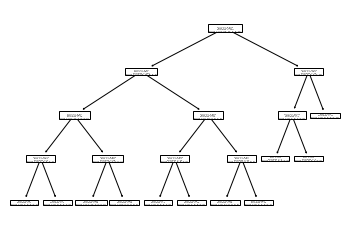

In [63]:
from sklearn import tree 
import matplotlib.pyplot as plt 

#plot the decision tree
tree.plot_tree(tree_model)

#save plot as pdf 
plt.savefig('./images/tree_model.pdf')
plt.show()

## Section III: SVM

### Preprocessing

In [64]:
# load packages and methods
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings 
warnings.filterwarnings('ignore')


In [65]:
#load glass csv data
glass = pd.read_csv("./datasets/glass.csv")

In [66]:
#print data dimensions 
print("Dimensions:", glass.shape)

#print data information 
print("Information:")
print(glass.info())

#print data summary 
print("Summary:\n",glass.describe())

#double check labels 
print('Class labels:', np.unique(y))

#load packages and methods 
from sklearn.svm import SVC 

Dimensions: (214, 10)
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
Summary:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730

In [67]:
#assign X and y values 
X= pd.DataFrame(glass.drop(["Type"], axis=1),
            columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
y=glass.Type

In [72]:
# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40, stratify=y)

### Learning - Training a SVM model

In [73]:
#load necessary packages and methods 
from sklearn.svm import SVC

#build SVM model 
#set the classifier 
svm_clf=SVC(kernel='linear',C=float("inf"), max_iter=5000, decision_function_shape='ovo')

#fit the classifier from training sets
svm_clf.fit(X_train_std, y_train)
print(svm_clf)

SVC(C=inf, decision_function_shape='ovo', kernel='linear', max_iter=5000)


### Prediction

Predict the label or class for a new sample with features as

RI | Na | Mg | Al | Si | K | Ca | Ba | Fe
--- | --- | --- | --- | --- | --- | --- | --- | --- 
1.6010| 12.51 | 1.67 | 2.15 | 72.19 | 0.79 | 9.3 | 0.28 | 0.54 

In [74]:
#get prediction
X_new=np.array([[1.6010,12.51,1.67,2.15,72.19,0.79,9.3,0.28,0.54]])
X_new_std=sc.transform(X_new)
y_hat=svm_clf.predict(X_new_std)
print(y_hat)

[7]


Predict the label or class for all the samples in the test set

In [75]:
y_hats=svm_clf.predict(X_test_std)
print(y_hats)

[1 2 1 2 2 7 1 1 1 2 1 2 1 6 3 2 2 7 2 2 1 1 1 2 1 2 7 1 6 6 1 1 2 2 1 1 1
 2 1 1 3 2 1 3 1 7 2 2 7 7 2 1 1 7 7 6 1 2 1 6 2 2 7 1 1]


### Classification Report

In [76]:
#get the classification report 
target_names=['class 1: buildingwindowsfloatprocessed','class 2: buildingwindowsnonfloatprocessed','class 3: vehiclewindowsnonfloatprocessed','class 5: containers','class 6: tableware','class 7: headlamps']

#print the classification report 
print(classification_report(y_test,y_hats,target_names=target_names))

                                           precision    recall  f1-score   support

   class 1: buildingwindowsfloatprocessed       0.44      0.57      0.50        21
class 2: buildingwindowsnonfloatprocessed       0.43      0.39      0.41        23
 class 3: vehiclewindowsnonfloatprocessed       0.00      0.00      0.00         5
                      class 5: containers       0.00      0.00      0.00         4
                       class 6: tableware       0.60      1.00      0.75         3
                       class 7: headlamps       1.00      1.00      1.00         9

                                 accuracy                           0.51        65
                                macro avg       0.41      0.49      0.44        65
                             weighted avg       0.46      0.51      0.48        65



## Section IV: Discussion

### Question 1: Describe training samples
- How many observations are there in the dataset? 
- How many features does each observation have? 
- What/Which columns did you include in your features? Why and Why not?
- What/Which column did you use for the label or target value?
- What do those values of labels mean? (You may want to check the [data source](#datasource))
- How many samples are there in your training set? How many in the test set?

Please answer those questions in the cell below.

#### Answer: 
- There were 214 oberservations 
- There were 10 features 
- I included all of the columns since all were acceptable (had all data, weren't missing information,and weren't duplicates)
- I used a drop type for the values 
- The features are the 'RI', 'Na','Mg', 'Al',	'Si', 'K',	'Ca',	'Ba',	'Fe' and labels are the names/types of the glasses.
- There are 214 samples in the training set and there are 214 in the test samples. 


### Question 2: Explore insights from the model - KNN
- How many neighbhors did you consider in the model you built?
- Why did you select the number? Have you changed the numbers? 
- Which distance function did you use in the model you built?
- Why did you select that distance function? Have you tried other distance function?
- Did any changes in the parameters or arguments (when you set the classifer) make your preidction or classificaton report different?
- How did you or can you fine tune the KNN model?

Please answer those questions in the cell below.

Answer:
- 6 neighbors 
- I selected 6 neighbors because we usually used 5 as the neighbors setting in the past labs but when I chose 5 I wouldn't get an output so when I changed it to 6 I would get an output of 6 neighbors. 
- I used the Manhattan distance model 
- I used this model because we learned in class that we use this distance model when we are finding the Minkowski distance. 
- No it didn't change anything but I did change the amount of neighbors to see how the system would react and affect the prediction. 
- We can fine tune the KNN model with determining the accuracy, choosing the correct distance models, and more to get a more accurate KNN model. 

### Question 3: Explore insights from the model - Decision Tree
- What is the maximum depth in the model you built? 
- Why did you select that number of depth?
- Did any changes in the parameters or arguments (when you set the classifer) make your prediction or classificaton report different?
- How did you or can you fine tune the Decision Tree model?
- Based on your tree structure (the plot), which feature may be the most important feature to make the prediction?

Please answer those questions in the cell below.

Answer: 
- I chose a maximum depth 4 
- Since the model isn't making too many decisions we would choose a low number so there aren't too many branches coming off of the decision tree. We chose 4 in the past labs and it seemed to be enough so I chose 4 as the maximum depth once again and got a very compact and straightforward decision tree. 
- No they didn't really change much so I didn't need to change the prediction since it was similar to the KNN model. 
- Decision trees are tricky if there is the slightest change in data can change the whole lay/build of the decision tree all together. From my research you can fine tune the decision trees with something called hyper parameter tuning which can affect the ins and outs of the decision trees parameters. 
- I believe the most important feature would be the first node on the decision tree which is . Which on the pdf is X[7] and contains 149 samples. 

### Question 4: Explore insights from the model - SVM
- Which kernel did you use in the model you built?
- Why did you select the kernel? Have you tried other kernel?
- Did any changes in the parameters or arguments (when you set the classifer) make your preidction or classificaton report different?
- How did you or can you fine tune the SVM model?

Please answer those questions in the cell below.

Answer: 
- I used a linear kernel in the model 
- I have not tried other kernels like nonlinear, polynominal, etc.,. I used linear kernel because it's the one I've used before but also I used it to best fit the margins and maximize it. 
- I did have to add a decision functions shape and the function max_iter for it to fit compared to the labs in the past and followed it from the links provided on Scikit website.  
- You can fine tune a SVM model by picking the right kernel to best fit the model. 

### Question 5: Compare learning algorithm
For each learning algorithm:
 - What are the strengths or drawbacks?
 - Based on those pros and cons, which learning algorithm(s) may be proper to use? 
 - How do those pros and cons affect your analyze in this assignment?

Please answer those questions in the cell below.

Answer: 
- For KNN a strength is that it's very straightforward and can withstand a large amount of data at a time. A weakness of KNN is that it uses a ton of memory storage and can have a big amount of outliers which isn't helping best fit the margins. For Decision trees a strength is that it's also straightforward like KNN, and it can predict an outcome a while into the future. A weakness of DT is that it may require larger trees depending on the data and it's a bit unstable. For SVM it's strengths are that it only uses support vectors and it's stable in high dimensions.A weakness of SVM is that it's time consuming and quite sensitive.  
- I believe the best learning algorithm used would be the decision tree because it will figure out which glass we are finding through process of elimination. 
- Pros and cons always help determine things and in my everyday life it helps me determine the actions/decisions. With this homework it helped be consider which learning algorithm best determines our results better and more accurately. 

### Question 6: Evaluate the models
From your classification report:
- Which model perform the best for this dataset? What might be the reasons to cause that?
- Which model perform the worst for this dataset? What might be the reasons to cause that?

Please answer those questions in the cell below.

Answer: 
-  I personally think that the Decision Tree is the best model for this data. I believe this because considering all the pros and cons of each Decision Tree seems to be the best fit. It's easy to interpret and uses normalization which can put the data into categories to find the best answer. 
- The worst for this data would be the KNN model. KNN models are nice when you are trying to figure out the most related values or where the data stands amongst all the other value points. KNN wouldn't really help us identify the glass in a timely manner. 

### Question 7: Reflect on your expereience
When you learn and implement those classification models:
- What is/are the most interesting part(s) for you?
- What is/are the most challenging part(s) for you?
- What is/are the not so fun part(s) for you?

Please answer those questions in the cell below.

Answer: 
- The most interesting part of machine learning to me is the fact we can take a few lines of code and determine bigger scale things. Also just fascinates me that we can calculate data with our computers (I'm old school). 
- The most challenging thing in this class/machine learning to me is just gaining a better understanding of Python problems and the language itself. I really thrive with problem solving especially when it comes to languages like JavaScript but Python is an obstacle in itself. 
- I wouldn't say that there are things that aren't fun to me in machine learning quite yet. I think the only thing that bothers me is that my computer is a piece of junk so running the programs on my computer can be a pain and very time consuming. Like I lost all of my previous labs and projects for some apparent reason and I can't seem to get them back so that is a pain. 

### Question 8: Imagine possible applications or future work 
Now, you have learned several fundemental classification learning algrithms:
- What problems or applications (in daily life, at work, in school, or...) do you want to solve/develop using those machine learning classificaton?
- To be able to solve the above problems or to build the applications, what kind of data or information you may need?

Please answer those questions in the cell below.

Answer: 
- We all can use machine learning in our everyday lives. One way I can apply machine learning is to apply it to my other courses where we are programming machines to impact the environment. 
- To solve the problems or build these models we need to have accurate and up to date data collections. Having the data in one collected place helps us better determine the code we will need. 